In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size':14, 'savefig.facecolor':'w'})

In [12]:
W = 80

folder_pics = 'pics/'
folders = [folder for folder in sorted(os.listdir()) if os.path.isdir(folder) and folder.startswith('tmp')]
folders

['tmp_cs2_0.33_re_0.91_nu_0.33_u_0.03_tau_1.49_cy_45.00_W_80_L_300',
 'tmp_cs2_0.33_re_1.88_nu_0.16_u_0.03_tau_0.98_cy_45.00_W_80_L_300',
 'tmp_cs2_0.67_re_0.91_nu_0.33_u_0.03_tau_1.00_cy_45.00_W_80_L_300',
 'tmp_cs2_0.67_re_1.88_nu_0.16_u_0.03_tau_0.74_cy_45.00_W_80_L_300']

In [7]:
short = True

d = {}
for folder in folders:
    print(folder)
    if not short:
        arr = np.loadtxt(folder + '/disk_re_0.25_0.txt')
        np.save(folder + '/disk_re_0.25_0_every_100.npy', arr[::100])
    else:
        arr = np.load((folder + '/disk_re_0.25_0_every_100.npy'))
        
    d[folder] = arr#[::100]
    print(d[folder].shape)

tmp_cs2_0.33_re_0.91_nu_0.33_u_0.03_tau_1.49_cy_45.00_W_80_L_300
(2236, 11)
tmp_cs2_0.33_re_1.88_nu_0.16_u_0.03_tau_0.98_cy_45.00_W_80_L_300
(2291, 11)
tmp_cs2_0.67_re_0.91_nu_0.33_u_0.03_tau_1.00_cy_45.00_W_80_L_300
(3071, 11)
tmp_cs2_0.67_re_1.88_nu_0.16_u_0.03_tau_0.74_cy_45.00_W_80_L_300
(3319, 11)


In [8]:
re = [float(f.split('_')[4]) for f in folders]
cs2 = [float(f.split('_')[2]) for f in folders]
nu = [float(f.split('_')[6]) for f in folders]
u = [float(f.split('_')[8]) for f in folders]
tau = [float(f.split('_')[10]) for f in folders]
inc = [f.split('_')[-1] for f in folders]
#inc = [x + 'BGK' for x in inc]
#inc = [x.replace('comp', '') for x in inc]

In [9]:
col = {0.16:'deepskyblue', 0.33:'salmon', 2.4:'mediumorchid'}
line = {0.33:'-', 0.67:'--'}
alpha = {'incBGK': 1, 'BGK':0.4}
marker = {0.03:'d', 0.06:'o', 0.015:'^'}

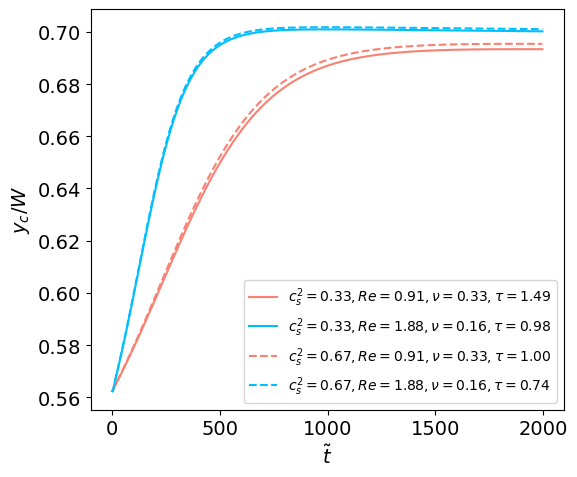

In [13]:
fig, ax = plt.subplots(figsize=(6,5))
for i, k in enumerate(d.keys()):
    #if inc[i] == 'BGK': continue
    if nu[i] == 2.4: continue
    if u[i] == 0.015: continue
    if '41' in k:
        label = None
        arr = d[k]
        ax.axhline(arr[-500,2] / W, color=col[nu[i]], alpha=0.3)   
    else:
        label = r'$c_s^2=%.2f, Re=%.2f, \nu=%.2f, \tau=%.2f$'%(cs2[i],
                                                              re[i],
                                                              nu[i],
                                                              tau[i])
    arr = d[k]
    mask = arr[:, 0] * u[i] / 10 < 2000
    plt.plot(arr[mask,0] * u[i] / 10, arr[mask,2] / W, 
             color=col[nu[i]],
             linestyle=line[cs2[i]],
             #markevery=[-1],
             #marker=marker[u[i]],
             markersize=7,
             label=label)
    
plt.legend(loc='lower right', fontsize=10)

ax.set_xlabel(r'$\tilde t$')
ax.set_ylabel(r'$y_c / W$')

fig.tight_layout()

fig.savefig(folder_pics + 'nd_time_nd_y_tau_nu_2.png', dpi=500)
fig.savefig(folder_pics +'nd_time_nd_y_tau_nu_2.pdf', dpi=500)